<a href="https://colab.research.google.com/github/dattha11/123/blob/main/YOLOv5_XacDinhVatThe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12332, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 12332 (delta 27), reused 19 (delta 7), pack-reused 12281
Receiving objects: 100% (12332/12332), 12.13 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (8502/8502), done.
/content/yolov5
     |████████████████████████████████| 596 kB 34.7 MB/s 
     |████████████████████████████████| 145 kB 40.2 MB/s 
     |████████████████████████████████| 178 kB 44.7 MB/s 
     |████████████████████████████████| 1.1 MB 58.1 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 138 kB 74.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google

In [3]:
!unrar x /content/things.rar

Streaming output truncated to the last 5000 lines.
Extracting  things/train/labels/9b62b7aa23d8eb6e_jpg.rf.7ccfb614400e5d02ad01efea64fa28b8.txt      79%  OK 
Extracting  things/train/labels/9b90410221ea23c1_jpg.rf.0ead88461851928557ad10024b083518.txt      79%  OK 
Extracting  things/train/labels/9b9b001e770a9e35_jpg.rf.3bfe7ef8d8665026b01a7a1af7e2b4f3.txt      79%  OK 
Extracting  things/train/labels/9b9b6096650a18fc_jpg.rf.f4c5c090cb8d78c56ab5e8126be4c519.txt      79%  OK 
Extracting  things/train/labels/9ba2387ee1e7e18b_jpg.rf.d55db0bd1f1d733fb8fb7df15ae8f793.txt      79%  OK 
Extracting  things/train/labels/9bae57f7c532c36c_jpg.rf.71fb2d1ae374fcb90dc49729c44a52ba.txt      79%  OK 
Extracting  things/train/labels/9bb0653db5f083f2_jpg.rf.42ba7bf5ee974712cc3075367a9c1747.txt      79%  OK 
Extracting  things/train/labels/9bb19e3f303ca6cf_jpg.rf.ae310d37d015d277e7af924bf81bd034.txt      79%  OK 
Extracting  things/tr

# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)

# Version

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/robolfow-preprocessing.png)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

Extracting Dataset Version Zip to /content/datasets/American-Mushrooms-1 in yolov5pytorch:: 100%|██████████| 278/278 [00:00<00:00, 1046.33it/s]


In [2]:
%pip install -qr /content/yolov5/requirements.txt

# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python /content/yolov5/train.py --img 416 --batch 16 --epochs 150 --data /content/yolov5/things/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/things/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-266-g34df503 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7

In [ ]:
Image(filename='/content/XacDinhVatThe/runs/train/exp2/test_images.jpg', width=1000)

In [ ]:
!python detect.py --weights /content/XacDinhVatThe/runs/train/exp2/weights/best.pt --img 416 --conf 0.25 --source /content/XacDinhVatThe/runs/train/exp2/test_images.jpg

In [ ]:
!python export.py --weights /content/XacDinhVatThe/runs/train/exp2/weights/best.pt --include tflite --img 416

In [ ]:
!python detect.py --weights /content/XacDinhVatThe/runs/train/exp2/weights/best-fp16.tflite --img 416 --conf 0.25 --source /content/XacDinhVatThe/runs/train/exp2/test_images.jpg

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source={dataset.location}/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-243-g7cef03d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "detect.py", line 252, in <module>
    main(opt)
  File "detect.py", line 247, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 92, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/model

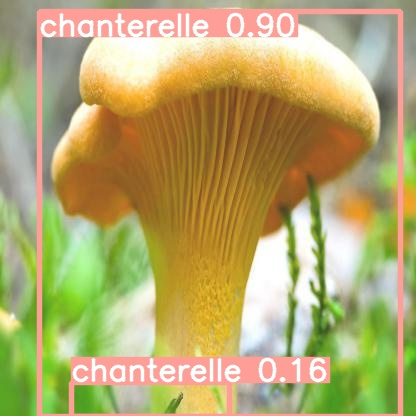

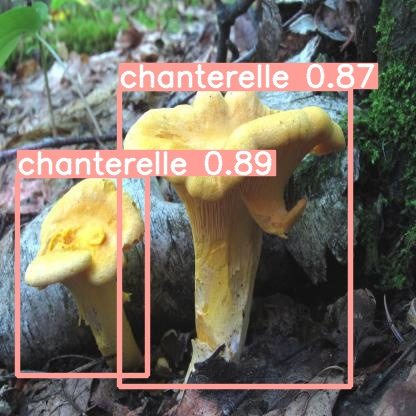

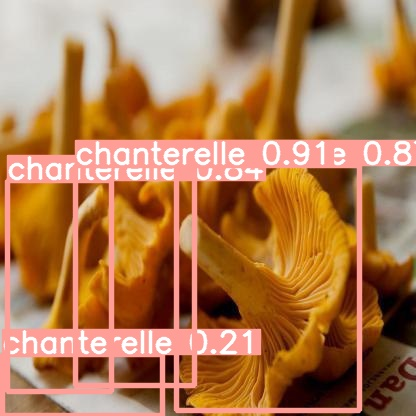

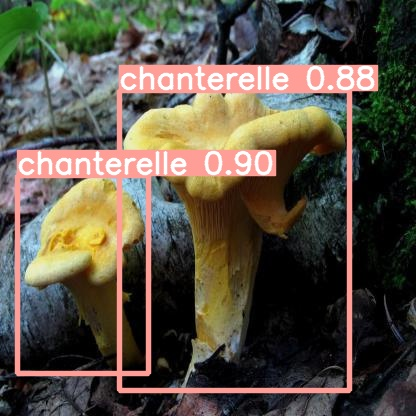

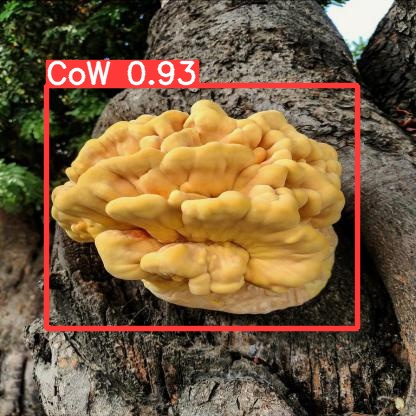

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python export.py --weight runs/train/exp2/weights/best.bt --include tflite --img 416

usage: export.py [-h] [--data DATA] [--weights WEIGHTS [WEIGHTS ...]]
                 [--imgsz IMGSZ [IMGSZ ...]] [--batch-size BATCH_SIZE]
                 [--device DEVICE] [--half] [--inplace] [--train] [--keras]
                 [--optimize] [--int8] [--dynamic] [--simplify]
                 [--opset OPSET] [--verbose] [--workspace WORKSPACE] [--nms]
                 [--agnostic-nms] [--topk-per-class TOPK_PER_CLASS]
                 [--topk-all TOPK_ALL] [--iou-thres IOU_THRES]
                 [--conf-thres CONF_THRES] [--include INCLUDE [INCLUDE ...]]
export.py: error: unrecognized arguments: --img416


In [ ]:
!unrar x /content/XacDinhVatThe.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/XacDinhVatThe.rar

Creating    XacDinhVatThe                                             OK
Extracting  XacDinhVatThe/.gitattributes                                   0%  OK 
Creating    XacDinhVatThe/.github                                     OK
Extracting  XacDinhVatThe/.github/CODE_OF_CONDUCT.md                       0%  OK 
Extracting  XacDinhVatThe/.github/dependabot.yml                           0%  OK 
Creating    XacDinhVatThe/.github/ISSUE_TEMPLATE                      OK
Extracting  XacDinhVatThe/.github/ISSUE_TEMPLATE/bug-report.yml            0%  OK 
Extracting  XacDinhVatThe/.github/ISSUE_TEMPLATE/config.yml                0%  OK 
Extracting  XacDinhVatThe/.github/ISSUE_TEMPLATE/feature-request.yml       0%  OK 
Extracting  XacDinhVatThe/.github/ISSUE_TEMPLATE/question.yml              0%  OK 
Extracting  XacDinhVatTh

In [ ]:
!unrar x /content/XacDinhVatThe/things.rar

Streaming output truncated to the last 5000 lines.
Extracting  things/train/labels/9b62b7aa23d8eb6e_jpg.rf.7ccfb614400e5d02ad01efea64fa28b8.txt      79%  OK 
Extracting  things/train/labels/9b90410221ea23c1_jpg.rf.0ead88461851928557ad10024b083518.txt      79%  OK 
Extracting  things/train/labels/9b9b001e770a9e35_jpg.rf.3bfe7ef8d8665026b01a7a1af7e2b4f3.txt      79%  OK 
Extracting  things/train/labels/9b9b6096650a18fc_jpg.rf.f4c5c090cb8d78c56ab5e8126be4c519.txt      79%  OK 
Extracting  things/train/labels/9ba2387ee1e7e18b_jpg.rf.d55db0bd1f1d733fb8fb7df15ae8f793.txt      79%  OK 
Extracting  things/train/labels/9bae57f7c532c36c_jpg.rf.71fb2d1ae374fcb90dc49729c44a52ba.txt      79%  OK 
Extracting  things/train/labels/9bb0653db5f083f2_jpg.rf.42ba7bf5ee974712cc3075367a9c1747.txt      79%  OK 
Extracting  things/train/labels/9bb19e3f303ca6cf_jpg.rf.ae310d37d015d277e7af924bf81bd034.txt      79%  OK 
Extracting  things/tr

In [ ]:
import shutil

#shutil.rmtree('/content/XacDinhVatThe')


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.936441387000002
GPU (s):
0.0405499789999908
GPU speedup over CPU: 72x


NameError: ignored